# Model to predict color from RGB value

Feedforward neural network for supervised learning of rgb color values

## Imports

In [20]:
from library.classes import Neuron, Layer, Network_Model
from library import helpers as hlp
import rgb_helpers as chlp
import pandas as pd

## Preprocess input data

The `pandas`-Library is used to preprocess input data.
Firstly, data is read from an Excel-file.

In [21]:
training_orig_df = pd.read_excel('datasets\\rgb.xlsx')
training_orig_df

,Name,R,G,B,Beige,Yellow,Orange,Red,Purple,Blue,Green,Grey,Brown,White,Black
0,Beige,138,102,66,1,0,0,0,0,0,0,0,0,0,0
1,Beige,169,131,7,1,0,0,0,0,0,0,0,0,0,0
2,Beige,190,189,127,1,0,0,0,0,0,0,0,0,0,0
3,Beige,194,176,120,1,0,0,0,0,0,0,0,0,0,0
4,Beige,198,166,100,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Yellow,244,169,0,0,1,0,0,0,0,0,0,0,0,0
209,Yellow,245,208,51,0,1,0,0,0,0,0,0,0,0,0
210,Yellow,248,243,53,0,1,0,0,0,0,0,0,0,0,0
211,Yellow,250,210,1,0,1,0,0,0,0,0,0,0,0,0


In [22]:
training_df = training_orig_df.copy()
training_df.drop(columns=['Name'], inplace=True)

The data is then split into training and validation data using the `split_training_val_data()` function. Here a percentage can be set.

In [23]:
train_df, val_df = hlp.split_training_val_data(training_df, 0.2)

The training and validation data are then split into input and output data using the `split_input_output_data()` function. The column headers of the training input have to specified.

In [24]:
x_columns = ['R', 'G', 'B']
y_columns = ['Beige', 'Yellow', 'Orange', 'Red', 'Purple', 'Blue', 'Green', 'Grey', 'Brown', 'White', 'Black']

train_df_x, train_df_y = hlp.split_input_output_data(train_df, x_columns, y_columns)
val_df_x, val_df_y = hlp.split_input_output_data(val_df, x_columns, y_columns)

In [25]:
train_df_x_norm = hlp.normalize(train_df_x, 0, 255, -1, 1)
val_df_x_norm = hlp.normalize(val_df_x, 0, 255, -1, 1)

In [26]:
train_df_x_norm

,R,G,B
0,0.082353,-0.200000,-0.482353
1,0.325490,0.027451,-0.945098
2,0.490196,0.482353,-0.003922
3,0.521569,0.380392,-0.058824
4,0.725490,0.223529,-1.000000
...,...,...,...
165,0.905882,0.294118,-0.960784
166,0.905882,0.709804,-0.913725
167,0.921569,0.631373,-0.600000
168,0.945098,0.905882,-0.584314


## Instanciate a model

`add_layer()` adds a new layer to the model. The amount of neurons and the desired activation function can be set. Layer 0 is automatically set to be the input layer. Weights and biases are randomly assigned.

In [27]:
mdl = Network_Model()
mdl.add_layer(3)
mdl.add_layer(16, activation_function='sigmoid')
mdl.add_layer(11, activation_function='sigmoid')

Using `plot_network()`, the Model can be visualized.

In [28]:
mdl.plot_network()

<div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(0, 1)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(0, 2)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(0, 3)<br>net 0<br>act 0<br>out 0</div>

<div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 1)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 2)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 3)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 4)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 5)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 6)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 7)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 8)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 9)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 10)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 11)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 12)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 13)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 14)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 15)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 16)<br>net 0<br>act 0<br>out 0</div>

<div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 1)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 2)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 3)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 4)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 5)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 6)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 7)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 8)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 9)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 10)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 11)<br>net 0<br>act 0<br>out 0</div>

Using `get_weights()`, the weights can be displayed. Weihts of row 0 are weights of the bias neuron of the respective layer.

In [29]:
mdl.layers[1].get_weights()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.870282,-0.279918,-0.700696,0.175573,-0.228593,0.025009,-0.991205,-0.656371,0.683047,0.529422,0.275638,-0.744799,-0.210067,-0.572151,-0.565868,-0.401526
1,-0.490751,-0.124323,0.507952,-0.681253,0.768375,0.975215,-0.759778,-0.773364,0.051035,0.902156,-0.804472,0.604993,-0.844777,-0.543282,-0.565646,-0.211427
2,0.821223,0.945568,-0.117919,-0.125696,-0.677854,0.766994,-0.358532,0.089227,-0.394064,0.099724,0.165733,-0.916843,-0.514110,0.559056,-0.888872,0.617288
3,0.893879,-0.062337,0.637985,0.293797,-0.185058,0.459252,-0.268291,-0.969029,0.486379,-0.773662,0.562685,0.690217,-0.857529,0.739922,-0.151382,-0.522886


Using the `predict()` method, a prediction is made based on a given input-vector. Since the model is not trained yet, the output is random.

In [30]:
rgb = [255, 0, 0]
input = chlp.rgb_to_norm(rgb)
pred = mdl.predict(input)
print(y_columns[pred.index(max(pred))])
chlp.plot_color(input)

Black


<div style="height: 100px; width: 100px; background-color: rgb(255.0,0.0,0.0);"></div>

## Training the model

Using *backpropagation of error* the model can be trained using the `train()` method. Arguments:
- **train_df_x**: Training set *p* of type *pandas.Dataframe*<br>
- **train_df_y**: Training input *t* of type *pandas.Dataframe*<br>
- **mode**: Mode of error evaluation, can be 'online' or 'offline', of type *string*<br>
- **epochs**: Number of epochs during the training, of type *int*<br>
- **learning_rate**: Learning rate $ \eta $ of the training session, $ 0 < \eta < 1 $, of type *float*

In [34]:
history = mdl.train(train_df_x_norm, train_df_y, epochs=100, debug=False, learning_rate=0.5)

#### Learning curve

The cumulative error over time can be plotted using the `plot_learning_curve()` method from the `helpers` module.

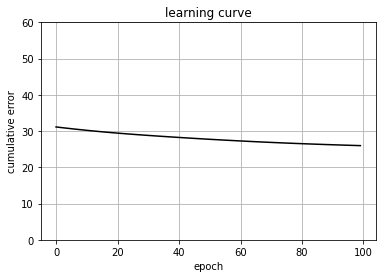

In [35]:
hlp.plot_learning_curve(history, 'epoch', 'cumulative error', 'learning curve')

#### Prediction

Using the trained model, more accurate predictions can now be made.

In [36]:
rgb = [174, 90, 137] # https://www.w3schools.com/colors/colors_rgb.asp
input = chlp.rgb_to_norm(rgb)
pred = mdl.predict(input) # Possible Color Predictions: Beige, Yellow, Orange, Red, Purple, Blue, Green, Grey, Brown, White, Black
print(y_columns[pred.index(max(pred))])
chlp.plot_color(input)

Purple


<div style="height: 100px; width: 100px; background-color: rgb(173.39999999999998,90.52499999999999,136.425);"></div>